In [1]:
# Query file path
# 查询文件路径
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
# Import the library
# 导入函数库
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split


# Set the random seed
# 设置随机种子
seed = int(time.time())

# Set path
# 设置路径
train_path = "/kaggle/input/digit-recognizer/train.csv"
test_path = "/kaggle/input/digit-recognizer/test.csv"
output_root = "/kaggle/working/"

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Read data
# 读取数据
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


Accuracy Score: 0.8692857142857143
Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       798
           1       0.99      0.93      0.96       966
           2       0.74      0.85      0.79       799
           3       0.84      0.84      0.84       847
           4       0.87      0.84      0.85       826
           5       0.79      0.84      0.81       780
           6       0.93      0.90      0.92       824
           7       0.93      0.84      0.88       884
           8       0.84      0.87      0.86       801
           9       0.82      0.84      0.83       875

    accuracy                           0.87      8400
   macro avg       0.87      0.87      0.87      8400
weighted avg       0.87      0.87      0.87      8400



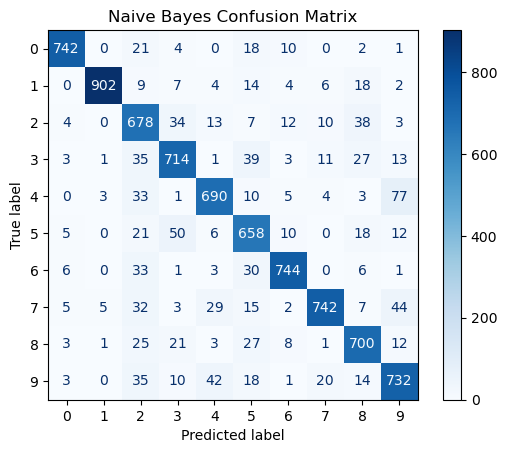

In [4]:
X = train_df.drop("label", axis=1).values
y = train_df["label"].values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=seed)

# PCA dimension reduction
# PCA 降维
pca = PCA(n_components=100, random_state=seed)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_val = pca.transform(X_val)

# Build a model
# 建立模型
clf = GaussianNB()
clf.fit(X_train, y_train)

# Test classification effect
# 检验分类效果
y_val_pred = clf.predict(X_val)
acc = accuracy_score(y_val, y_val_pred)
cr = classification_report(y_val, y_val_pred)

print(f"Accuracy Score: {acc}")
print(f"Classification Report: \n{cr}")

ConfusionMatrixDisplay.from_predictions(y_val, y_val_pred, cmap="Blues")
plt.title("Naive Bayes Confusion Matrix")
plt.show()

In [5]:
# Predict the outcome
# 预测结果 
X_test = pca.transform(test_df.values)
pred_df = pd.DataFrame({"ImageId": test_df.index + 1, "Label": clf.predict(X_test)})
pred_df.to_csv(f"{output_root}submission_{seed}.csv", index=False)
pred_df.head(10)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3
